##### Problem Statement:- To study the effect of factors gender, race_ethnicity, parental_level_of_educatio, test_preparation_course like on students perofrmace

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings("ignore")

In [2]:
file_path = Path('E:/E2E-ML-Projects/Student-Performance/notebooks/data/stud.csv')
df = pd.read_csv(file_path)

In [3]:
df.shape

(1000, 8)

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [7]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
#df.drop_duplicates(inplace=True)

In [10]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [11]:
print('Categories in gender column are:  ', end='')
print(df['gender'].unique())

print('\nCategories in race_ethnicity column are:  ', end='')
print(df['race_ethnicity'].unique())

print('\nCategories in parental_level_of_education column are:  ', end='')  
print(df['parental_level_of_education'].unique())

print('\nCategories in lunch column are:  ', end='')
print(df['lunch'].unique())

print('\nCategories in test_preparation_course column are:  ', end='')
print(df['test_preparation_course'].unique())

Categories in gender column are:  ['female' 'male']

Categories in race_ethnicity column are:  ['group B' 'group C' 'group A' 'group D' 'group E']

Categories in parental_level_of_education column are:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Categories in lunch column are:  ['standard' 'free/reduced']

Categories in test_preparation_course column are:  ['none' 'completed']


In [12]:
num_features = [col for col in df.columns if df[col].dtype != 'object']
cat_features = [col for col in df.columns if df[col].dtype == 'object']

In [13]:
num_features, cat_features

(['math_score', 'reading_score', 'writing_score'],
 ['gender',
  'race_ethnicity',
  'parental_level_of_education',
  'lunch',
  'test_preparation_course'])

In [14]:
df['Total Marks'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['Average Marks'] = df['Total Marks'] / 3

In [15]:
df['Average Marks'] = df['Average Marks'].astype(int)

In [16]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total Marks,Average Marks
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72
1,female,group C,some college,standard,completed,69,90,88,247,82
2,female,group B,master's degree,standard,none,90,95,93,278,92
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49
4,male,group C,some college,standard,none,76,78,75,229,76


In [18]:
reading_less_than_20 = df[df['reading_score'] < 20]
writing_less_than_20 = df[df['writing_score'] < 20]
math_less_than_20 = df[df['math_score'] < 20]

print(f'Number of students who scored less than 20 in reading: {reading_less_than_20.shape[0]}')
print(f'Number of students who scored less than 20 in writing: {writing_less_than_20.shape[0]}')  
print(f'Number of students who scored less than 20 in math: {math_less_than_20.shape[0]}')

Number of students who scored less than 20 in reading: 1
Number of students who scored less than 20 in writing: 3
Number of students who scored less than 20 in math: 4


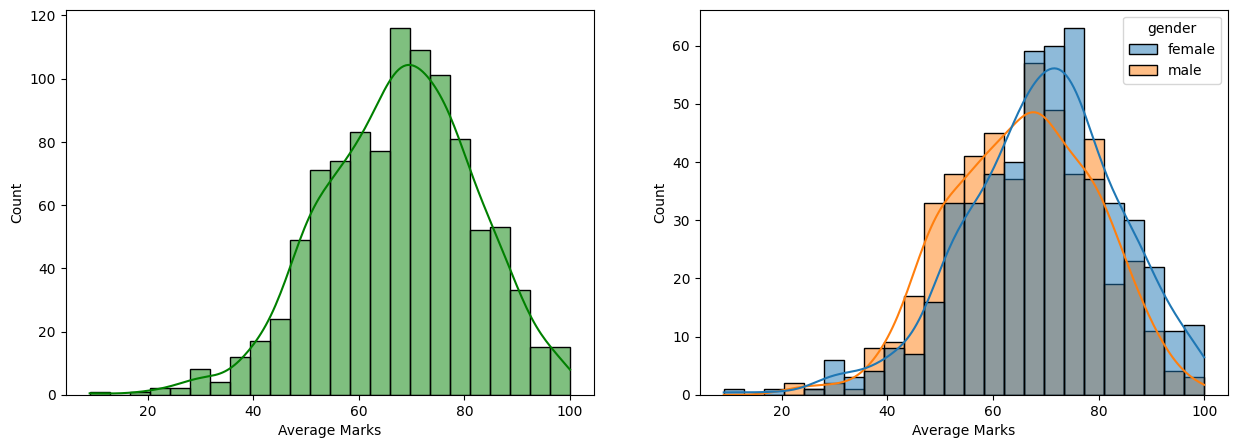

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

plt.subplot(121)
sns.histplot(data=df, x='Average Marks', kde=True, color='g')

plt.subplot(122)
sns.histplot(data=df, x='Average Marks', kde=True, hue='gender')
plt.show()

<Axes: xlabel='Total Marks', ylabel='Count'>

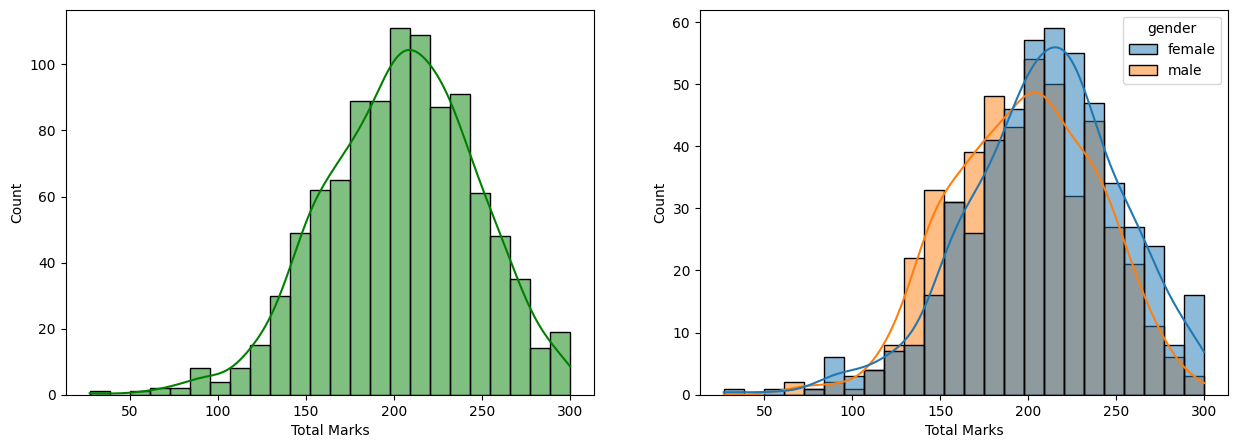

In [20]:
fig, axs = plt.subplots(1,2, figsize=(15,5))

plt.subplot(121)
sns.histplot(data=df, x='Total Marks', kde=True, color='g')

plt.subplot(122)
sns.histplot(data=df, x='Total Marks', kde=True, hue='gender')

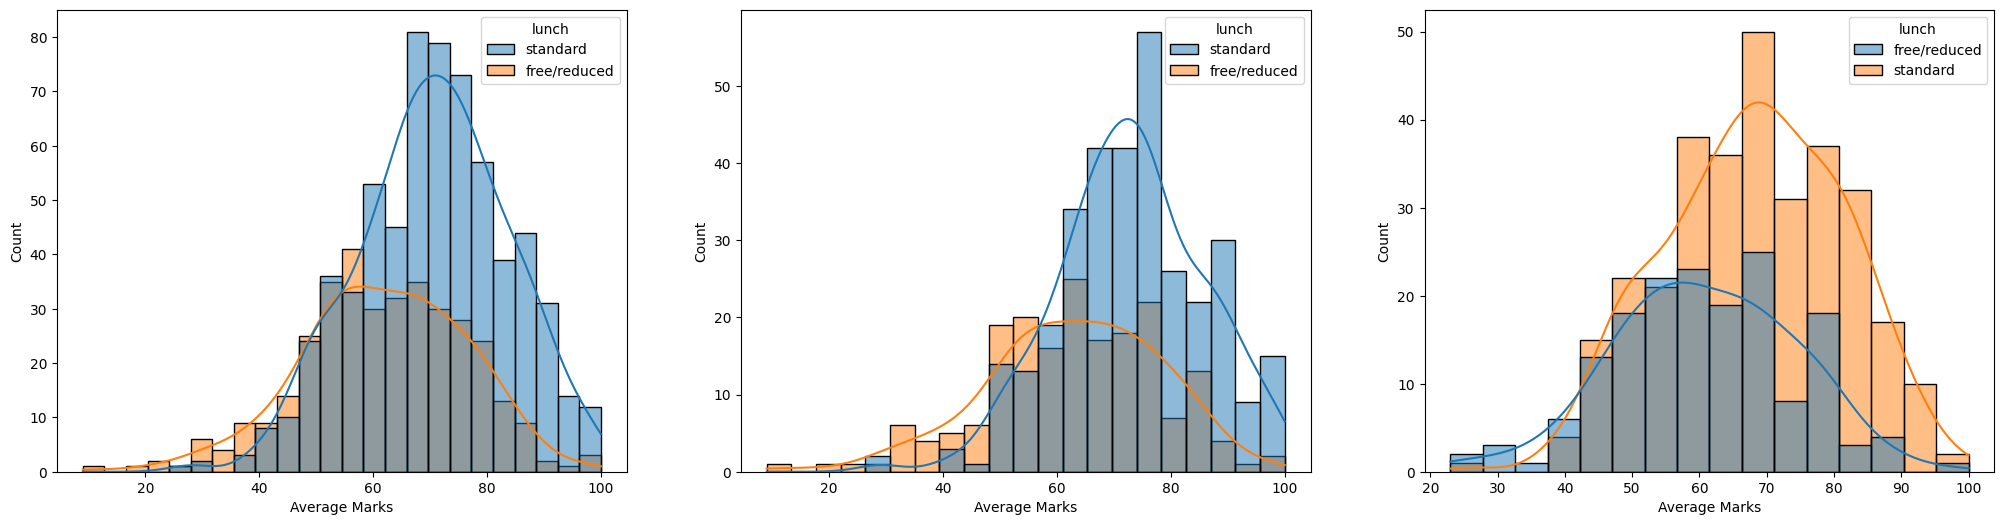

In [27]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6))

plt.subplot(131)
sns.histplot(data=df, x='Average Marks', kde=True, hue='lunch')

plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='Average Marks', kde=True, hue='lunch')

plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='Average Marks', kde=True, hue='lunch')

plt.show()

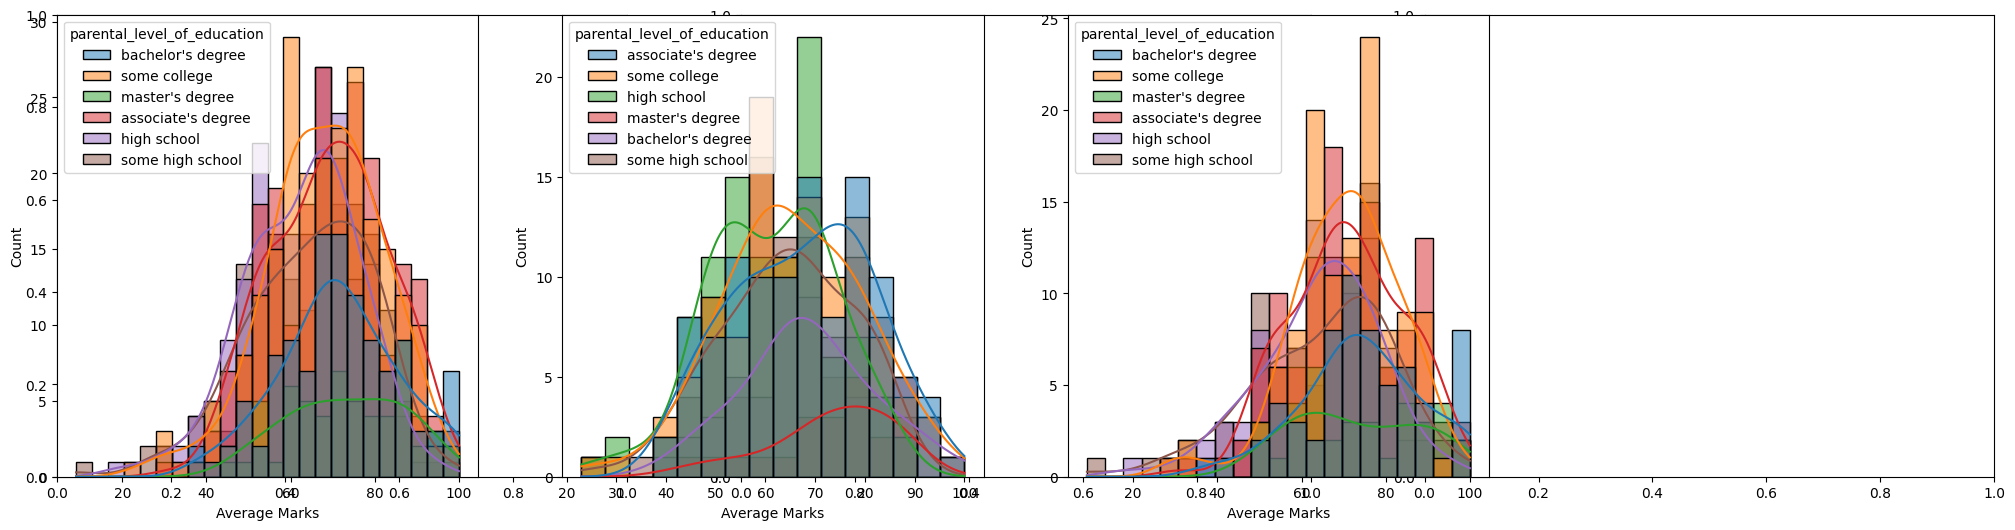

In [29]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='Average Marks',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='Average Marks',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='Average Marks',kde=True,hue='parental_level_of_education')
plt.show()

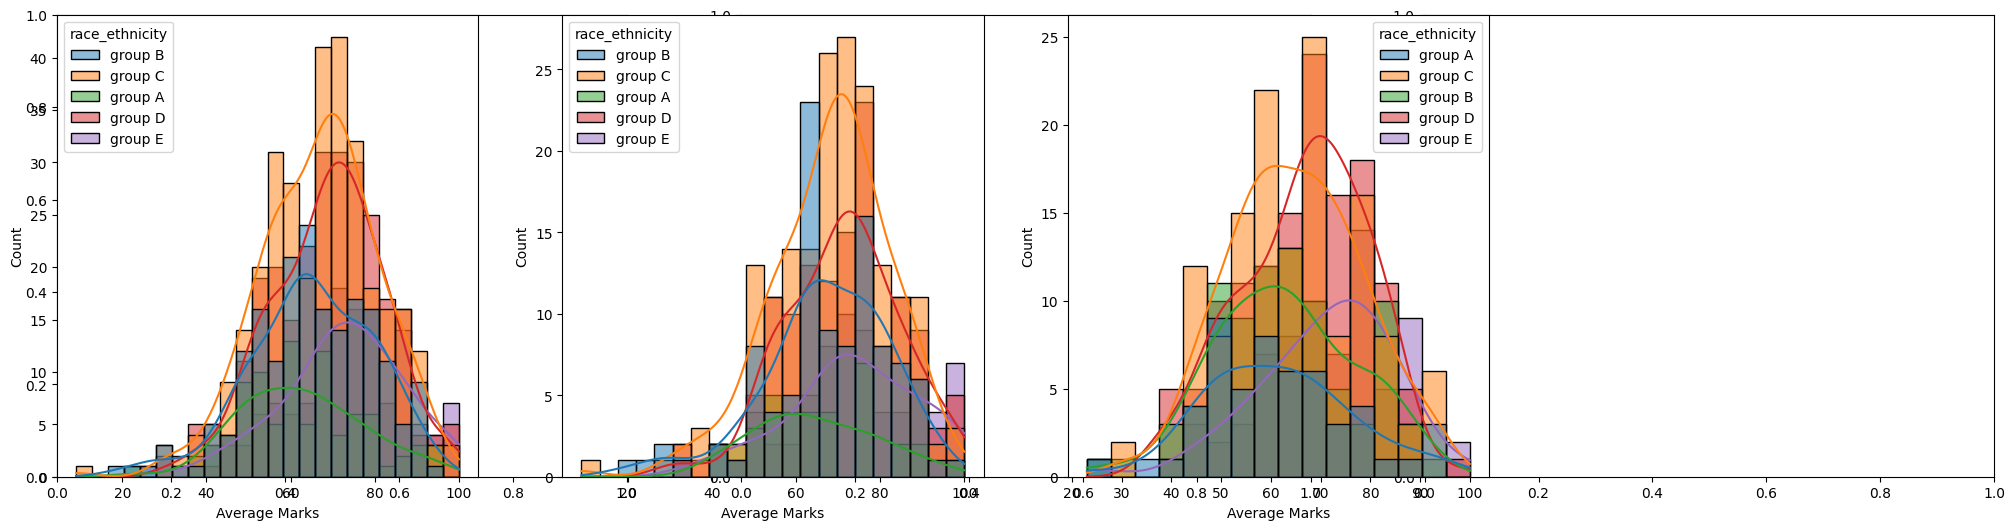

In [31]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='Average Marks',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='Average Marks',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='Average Marks',kde=True,hue='race_ethnicity')
plt.show()

In [33]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'Total Marks', 'Average Marks'],
      dtype='object')

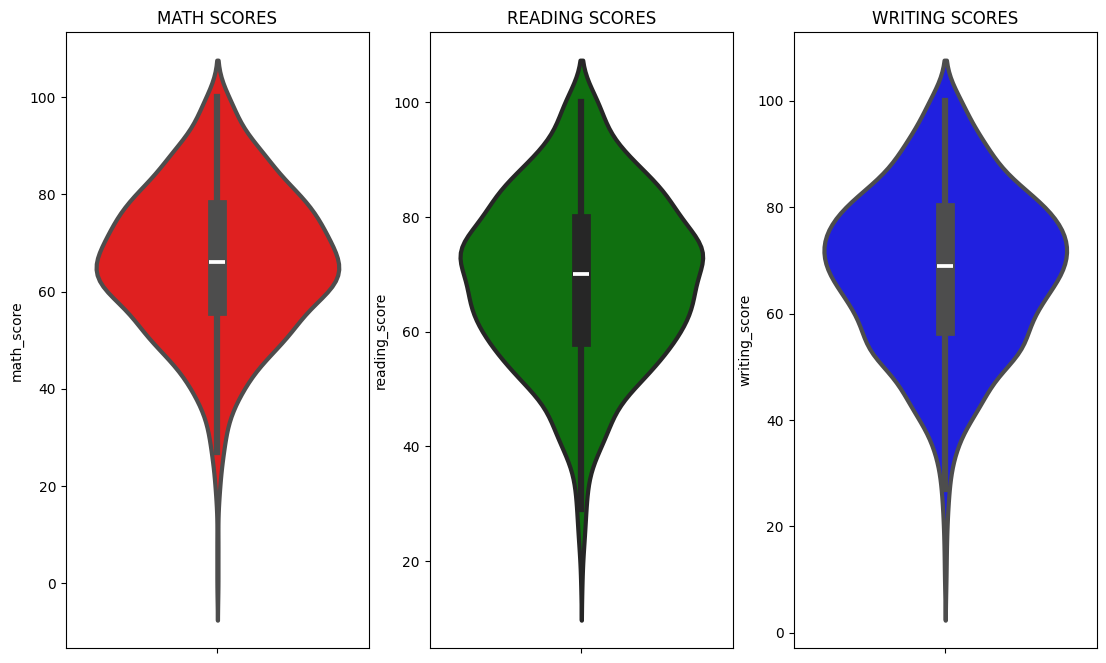

In [34]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

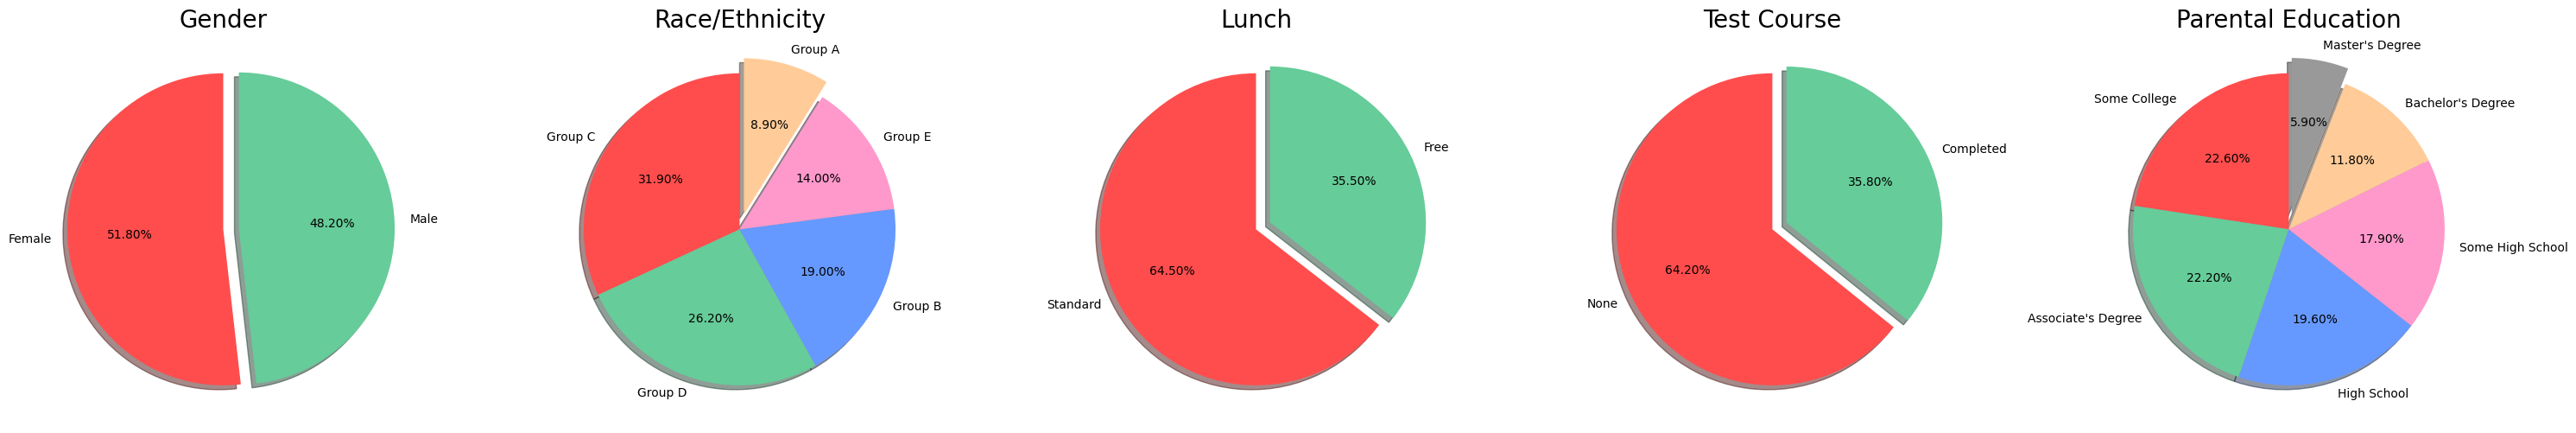

In [41]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = ['Female', 'Male']
colors = ['#ff4d4d', '#66cc99']
explode = [0, 0.1]

plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%', shadow=True, explode=explode, startangle=90)
plt.title('Gender', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = ['Group C', 'Group D', 'Group B', 'Group E', 'Group A']
colors = ['#ff4d4d', '#66cc99', '#6699ff', '#ff99cc', '#ffcc99']
explode = [0, 0, 0, 0, 0.1]

plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%', shadow=True, explode=explode, startangle=90)
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = ['Standard', 'Free']
colors = ['#ff4d4d', '#66cc99']
explode = [0, 0.1]

plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%', shadow=True, explode=explode, startangle=90)
plt.title('Lunch', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = ['None', 'Completed']
colors = ['#ff4d4d', '#66cc99']
explode = [0, 0.1]

plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%', shadow=True, explode=explode, startangle=90)
plt.title('Test Course', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = ['Some College', "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"]
colors = ['#ff4d4d', '#66cc99', '#6699ff', '#ff99cc', '#ffcc99', '#999999']
explode = [0, 0, 0, 0, 0, 0.1]

plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%', shadow=True, explode=explode, startangle=90)
plt.title('Parental Education', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()


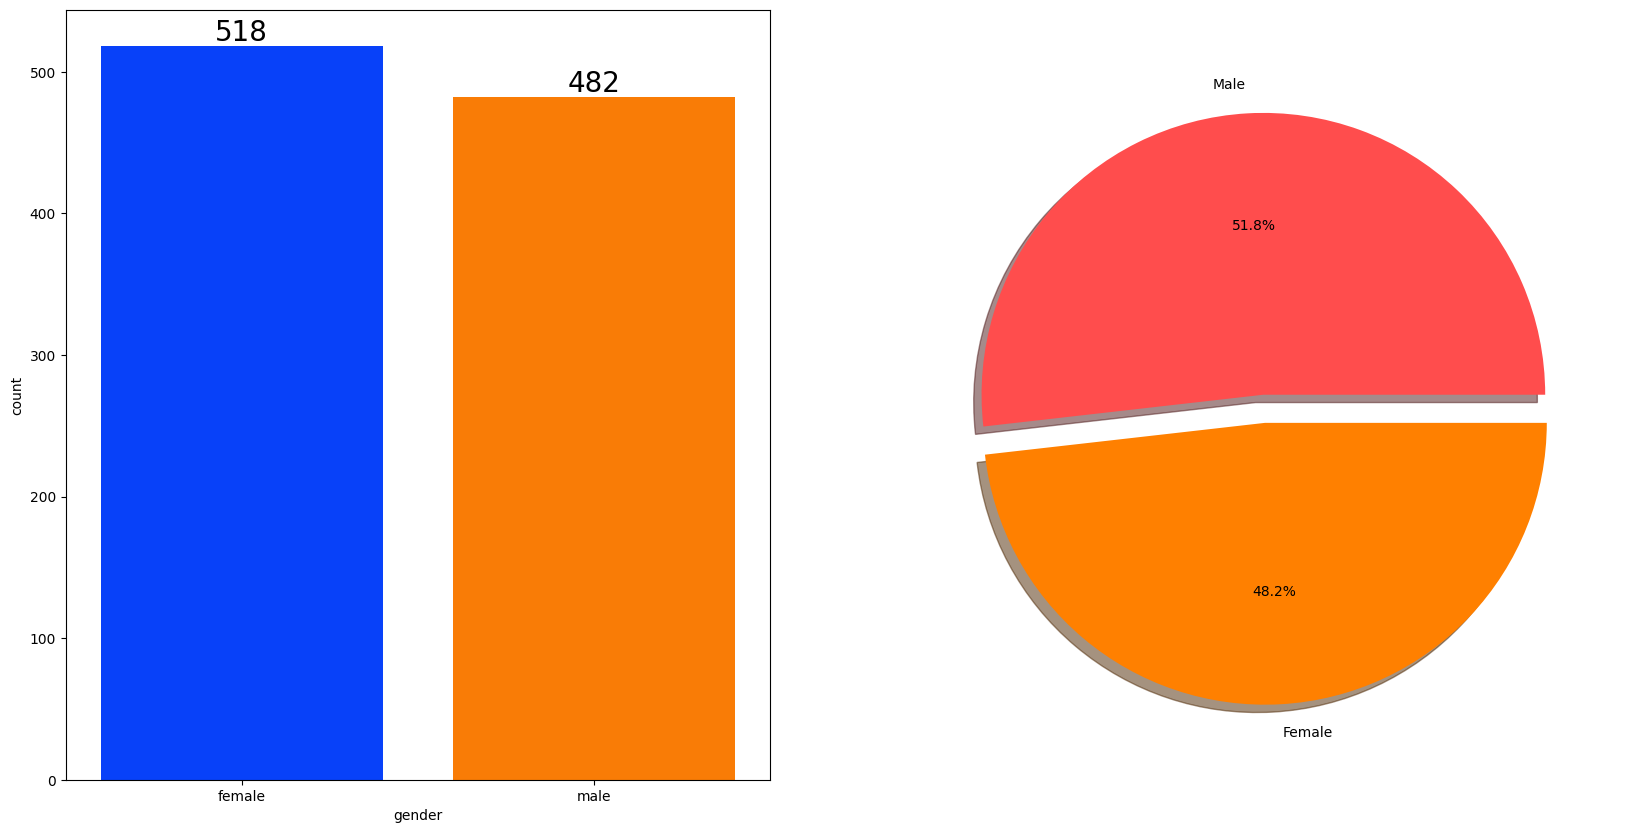

In [43]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

In [44]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'Total Marks', 'Average Marks'],
      dtype='object')

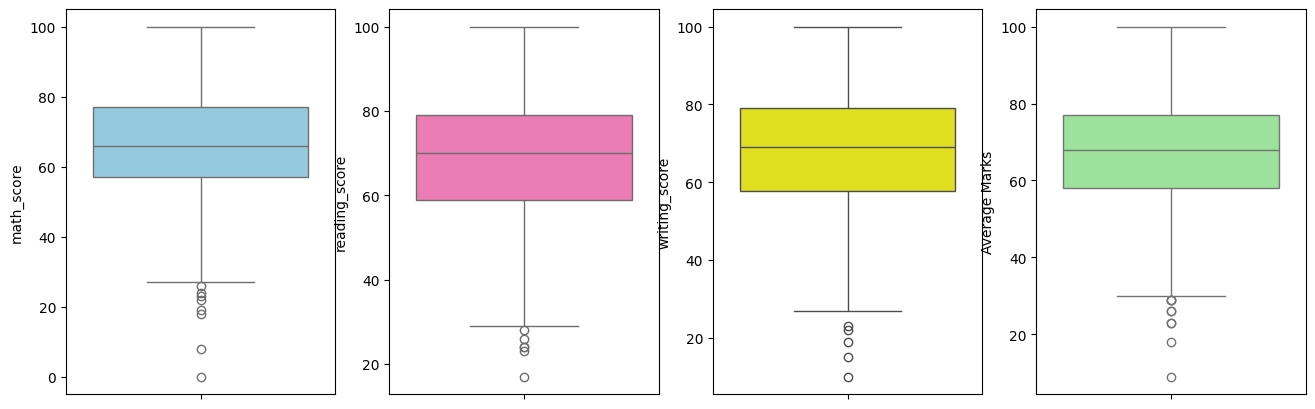

In [45]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Average Marks'],color='lightgreen')
plt.show()